<a href="https://colab.research.google.com/github/tuangpornnapat/final.project/blob/main/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset from google drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import module

In [40]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import *
from keras.models import *
import cv2
from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(1./255)

In [42]:
train_path = '/content/drive/MyDrive/alllung/train'
test_path = '/content/drive/MyDrive/alllung/test'

In [43]:
train_gen = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=64,
                                              class_mode='categorical',
                                              shuffle=True)
test_gen = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle=False)

print(train_gen.class_indices)
print(test_gen.class_indices)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


Creating a model

In [44]:
model = Sequential() 
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))  
model.add(MaxPool2D())
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(128,activation="relu")) 
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax")) 

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

Transfer Learning

In [45]:
tf.keras.backend.clear_session()
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(224,224, 3))
base_model.summary()

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(3, activation='softmax', name='softmax')(x)

model = Model(inputs=base_model.input,outputs=output_layer)
model.summary()
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics = ["accuracy"])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [46]:
baseModel = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

headModel = baseModel.output
headModel = AveragePooling2D()(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Training a model

In [47]:
r = model.fit_generator(train_gen,
                              validation_data=test_gen,steps_per_epoch=10,
                              epochs=20)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 50s 5s/step - loss: 2.1359 - accuracy: 0.6719 - val_loss: 0.8478 - val_accuracy: 0.6638
Epoch 2/20
10/10 [==============================] - 47s 5s/step - loss: 0.7751 - accuracy: 0.6844 - val_loss: 0.5510 - val_accuracy: 0.7663
Epoch 3/20
10/10 [==============================] - 46s 5s/step - loss: 0.5669 - accuracy: 0.7867 - val_loss: 0.4856 - val_accuracy: 0.7865
Epoch 4/20
10/10 [==============================] - 46s 5s/step - loss: 0.4271 - accuracy: 0.8453 - val_loss: 0.3990 - val_accuracy: 0.8602
Epoch 5/20
10/10 [==============================] - 47s 5s/step - loss: 0.4575 - accuracy: 0.8125 - val_loss: 0.3181 - val_accuracy: 0.8975
Epoch 6/20
10/10 [==============================] - 48s 5s/step - loss: 0.4005 - accuracy: 0.8469 - val_loss: 0.3174 - val_accuracy: 0.8703
Epoch 7/20
10/10 [==============================] - 46s 5s/step - loss: 0.2445 - accuracy: 0.9062 - val_loss: 0.2589 - val_accuracy: 0.9068
Epoch 8/20
10/10 [==

In [48]:
evaluation = model.evaluate(test_gen)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_gen)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 29s 1s/step - loss: 0.1267 - accuracy: 0.9557
Test Accuracy: 95.57%
81/81 [==============================] - 120s 1s/step - loss: 0.1110 - accuracy: 0.9627
Train Accuracy: 96.27%


In [49]:
pred = model.predict(test_gen) #ดูความแม่นยำ

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Model Loss and Accurary

Text(0.5, 0, 'epoch')

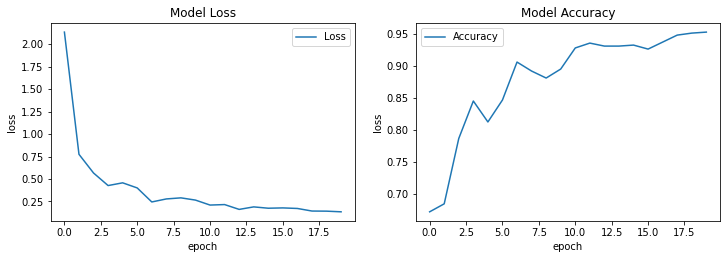

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

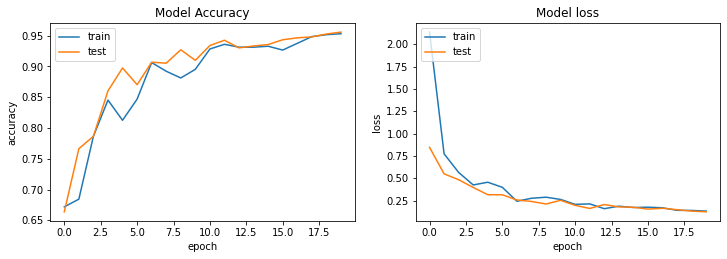

In [51]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs=range(len(acc))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [52]:
class_dict = {0:'COVID19',
              1:'NORMAL',
              2:'PNEUMONIA'}

Test Model

In [53]:
file_path =  '/content/drive/MyDrive/alllung/test/COVID19/COVID19(485).jpg'

prediction:  COVID19


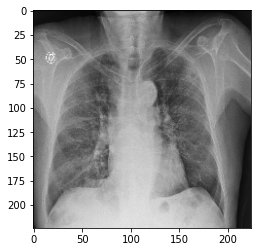

In [54]:
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image,(224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis = 0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]
print("prediction: " ,pred_class)